In [1]:
import pdfplumber
import re
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'

In [2]:
x0 = 0    # Distance of left side of character from left side of page.
x1 = 0.4  # Distance of right side of character from left side of page.
y0 = 0  # Distance of bottom of character from bottom of page.
y1 = 1  # Distance of top of character from bottom of page.

# file = pdfplumber.open('Kenneth M Hoffman, Ray Kunze - Linear Algebra -Prentice Hall (1971).pdf')
file = pdfplumber.open('David J. Griffiths - Introduction to Electrodynamics (1999, Prentice-Hall) - libgen.lc.pdf') 

node_list = []

for x in range(578,593):
    all_content = []
    page = file.pages[x]
    
    width = page.width
    height = page.height

    # Crop pages
    left_bbox = (0*float(width), y0*float(height), x1*float(width), y1*float(height))
    page_crop = page.crop(bbox=left_bbox)
    left_text = page_crop.extract_text(x_tolerance=1)

    right_bbox = (x1*float(width), y0*float(height), 1*float(width), y1*float(height))
    page_crop = page.crop(bbox=right_bbox)
    right_text = page_crop.extract_text(x_tolerance=1)

    page_context = '\n'.join([left_text, right_text])
    all_content.append(page_context)

    text_=all_content#.extract_text()

    if ('Index' in text_[0]) or ('INDEX' in text_[0]):
        new_text_ = text_[0].split(',')
        new_text_ = list(new_text_)

        new_text_ = [x.replace('\n', ' ').replace('Index','').replace('INDEX','') for x in new_text_]
        new_text_ = [x if not x.isdigit() else '' for x in new_text_]

        for y in range(len(new_text_)):
            if new_text_[y].isdigit():
                pass
            else:
                result = ''.join([i for i in new_text_[y] if not i.isdigit()])
                node_list.append(result.replace('\n','').replace('- ',''))

node_list = [name for name in node_list if name.strip()]
node_list = [name.lstrip() for name in node_list]
node_list = [name for name in node_list if name[0].isupper()]
node_list = [name for name in node_list if len(name)>1]

In [3]:
for i,node in enumerate(node_list):
    node = ' '.join( [w for w in node.split() if len(w)>1] )
    node = node.split(':')
    node = node[0].replace('Index ','')
    node_list[i] = node

In [4]:
all_chapters, all_sections, all_subsections = ([] for x in range(3))

# There are 12 chapters,
# The maximum number of sections in a chapter is 6
# The maximum number of subsections in a section is 7

## Thus, we are looking for strings of the format: 
# %d%d.%d.%d or %d.%d.%d for subsections
# %d%d.%d or %d.%d for sections
# %d%d or %d for chapters

for x in range(3,9):
    
    text_ = file.pages[x].extract_text(x_tolerance=1)
    text_list = text_.split('\n')
    text_list_new = []

    for line_ in range(len(text_list)):
        
        text=text_list[line_]

        #######
        #None of the names extend to two lines (manually checked), so we can just check if the first character is digit and that should be enough.
        #######

        if (text[0].isdigit()):
            text_list_new.append(text)

    for element in text_list_new:
        if (re.match('^[0-9]\.[0-9]\.[0-9]$',element[:5])) or (re.match('^[0-9][0-9]\.[0-9]\.[0-9]$',element[:6])):
            all_subsections.append(element)
        elif (re.match('^[0-9]\.[0-9]$',element[:3])) or (re.match('^[0-9][0-9]\.[0-9]$',element[:4])):
            all_sections.append(element)
        elif (re.match('^[0-9]$',element[:1])) or (re.match('^[0-9][0-9]$',element[:2])):
            all_chapters.append(element)

### Section cleaning ###
for i, a_ss in enumerate(all_subsections):
    while (re.match('^\.$',a_ss[0])) or (re.match('^[0-9]$',a_ss[0])):
        a_ss = a_ss[1:]
    while (re.match('^\.$',a_ss[-1])) or (re.match('^[0-9]$',a_ss[-1])):
        a_ss = a_ss[:-1].rstrip()
    all_subsections[i] = a_ss

all_subsections=[x.lstrip().rstrip() for x in all_subsections]
all_subsections= [re.sub('\s+',' ',x) for x in all_subsections]   
##############################################################################  

### Section cleaning ###
for i, a_s in enumerate(all_sections):
    while (re.match('^\.$',a_s[0])) or (re.match('^[0-9]$',a_s[0])):
        a_s = a_s[1:]
    while (re.match('^\.$',a_s[-1])) or (re.match('^[0-9]$',a_s[-1])):
        a_s = a_s[:-1].rstrip()
    all_sections[i] = a_s

all_sections=[x.lstrip().rstrip() for x in all_sections]
all_sections= [re.sub('\s+',' ',x) for x in all_sections]   
##############################################################################   


### Chapter cleaning ###
for i, a_c in enumerate(all_chapters):
    while (re.match('^\.$',a_c[0])) or (re.match('^[0-9]$',a_c[0])):
        a_c = a_c[1:]
        if len(a_c) < 1:
            break
    if len(a_c) > 0:
        while (re.match('^\.$',a_c[-1])) or (re.match('^[0-9]$',a_c[-1])):
            a_c = a_c[:-1].rstrip()
            if len(a_c) < 1:
                break
    all_chapters[i] = a_c

all_chapters=[x.lstrip().rstrip() for x in all_chapters]
all_chapters= [re.sub('\s+',' ',x) for x in all_chapters]   
############################################################################## 

all_chapters = [x for x in all_chapters if x != '']
all_sections = [x for x in all_sections if x != '']
all_subsections = [x for x in all_subsections if x != '']

len(all_chapters), len(all_sections), len(all_subsections)


(12, 45, 162)

In [5]:
subsection_count =(5+7+6+2+3+2) + (4+4+5+4+4) + (6+4+2+4) + (4+3+3+4) + (3+2+4+3) + (4+3+3+2) + (3+4+6) + (2+4) + (4+3+3+3+3) + (3+2+2) + (4+3) + (4+4+5)
section_count = (6+5+4+4) + (4+4+3+2) + (5+3+2+3)

In [6]:
it_section=0
dict_section_page_line={}

for x in range(17,564): #564 #74 #17
    text_=file.pages[x].extract_text(x_tolerance=1)
    text_=text_.lower()
    text_list = text_.split('\n')

    text_new=[re.sub('\s+',' ',x) for x in text_list]

    # if x == 408:
    #     print(text_new)

    for i, line in enumerate(text_new):

        line = line.replace('l.3','1.3')
        line = line.replace('~.3','4.3')
        line = line.replace('.a.~','4.4')
        line = line.replace('ofb','of b')
        line = line.replace('~otential','potential')
        line = line.replace('•. 1','6.1')
        line = line.replace('".1','7.1')
        line = line.replace('".2','7.2')
        line = line.replace('~.4','9.4')

        if (re.match('^[0-9]\.[0-9] $',line[:4])) or (re.match('^[0-9][0-9]\.[0-9] $',line[:5])):
            while (line[0].isdigit()) or (line[0] == '.'):
                line = line[1:].lstrip()
            
            if line == all_sections[it_section].lower():
                dict_section_page_line[str(it_section)+'.'+all_sections[it_section]] = [x,i]
                it_section += 1
                if it_section == len(all_sections):
                    break
    
# dict_section_page_line

In [7]:
for key in dict_section_page_line.keys():
    if type(dict_section_page_line[key][1])==np.ndarray:

        dict_section_page_line[key][1]=dict_section_page_line[key][1][0]

In [57]:
dict_section_text={}
page_nums, line_nums = ([] for x in range(2)) 
for key in dict_section_page_line.keys():
    page_nums.append(dict_section_page_line[key][0])
    line_nums.append(dict_section_page_line[key][1])

   
section_names=list(dict_section_page_line.keys())

it_section=0
curr_page = 17
for page, line in zip(page_nums[1:], line_nums[1:]):
    text_section=[] 

    while curr_page != page:
        text_ = file.pages[curr_page].extract_text(x_tolerance=1)
        text_ = text_.lower()
        text_list = text_.split('\n')
        text_section.append(text_list[line:])
        curr_page += 1

    if curr_page == page:
        text_ = file.pages[curr_page].extract_text(x_tolerance=1)
        text_ = text_.lower()
        text_list = text_.split('\n')
        text_section.append(text_list[:line])
        
        dict_section_text[section_names[it_section]] = text_section
        it_section += 1

    if curr_page == page_nums[-1]:

        while curr_page != 563:
            text_ = file.pages[curr_page].extract_text(x_tolerance=1)
            text_ = text_.lower()
            text_list = text_.split('\n')
            text_section.append(text_list)
            curr_page += 1
            
        dict_section_text[section_names[it_section]] = text_section

        break
        

In [59]:
dict_section_textcombined=dict_section_text.copy()
for k in dict_section_text.keys():
#     print(dict_section_text[k],'\n\n')
    text_combined='  '
    y=' '
    
    for xx in dict_section_text[k]:
        for x in xx:
            if text_combined[-2]=='-':
                text_combined=text_combined[0:-2]+x
            else:
                text_combined=text_combined+x
    dict_section_textcombined[k]=text_combined

In [61]:
def dict_text_to_dict_keyword(temp_dict_text):

    temp_dict_section_keywords_line_no={}

    glossary_words=node_list.copy()
    it_gloss=0
    for x in glossary_words:
        print(it_gloss,'==',x,end='\r')
        it_gloss=it_gloss+1
        x_key=x
        x=x.split(' ')

        temp_dict_section_keywords_line_no[x_key]={}

        for k in temp_dict_text.keys():
            temp_dict_section_keywords_line_no[x_key][k]=[]
            search_text=temp_dict_text[k]
            search_text=[x for x in search_text.split(' ') if x!='']
            for it in range(len(search_text)-1):
                if [s.lower() for s in x] == search_text[it:it+len(x)]:
                    (temp_dict_section_keywords_line_no[x_key][k]).append(it)

    return temp_dict_section_keywords_line_no

In [64]:
def simpleaxis(ax,xlab_,ylab_):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel(xlab_,fontsize=12) 
    ax.set_ylabel(ylab_,fontsize=12)   

In [62]:
dict_section_keywords_line_no = dict_text_to_dict_keyword(dict_section_textcombined)

In [65]:
plot_keywords = rnd.sample(list(dict_section_keywords_line_no.keys()),k=20)

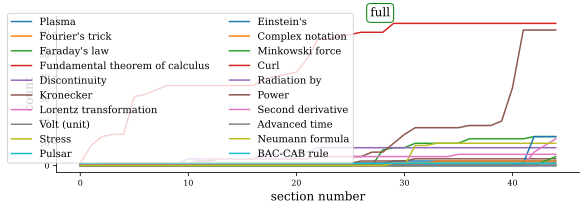

In [68]:
fig,ax = plt.subplots(1,1,figsize=(8,3))
# ax = ax.flatten()

xlab_='section number'
ylab_='count'


dict_list = [dict_section_keywords_line_no]#,dict_only_section_keywords_line_no,dict_only_exercise_keywords_line_no]
dict_names = ['full']#,'only-section','only exercise']
for i, dictionary, name in zip(range(3),dict_list,dict_names):
    for k in range(20):
        temp_keyword_page = (list((dictionary[plot_keywords[k]]).values()))
        temp_keyword_page = np.cumsum([len(x) for x in temp_keyword_page])

        if i ==0:
            simpleaxis(ax,xlab_,ylab_)
            ax.plot(range(len(temp_keyword_page)),temp_keyword_page,label=plot_keywords[k])
        else:
            simpleaxis(ax,'',ylab_)
            ax.plot(range(len(temp_keyword_page)),temp_keyword_page)

    ax.text(0.6,1.0,name,fontsize=12, bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'), transform = ax.transAxes)


fig.legend(ncol=2,bbox_to_anchor=(0.6,0.95),fontsize=10)
plt.tight_layout()
plt.savefig('keyword_section_exercise_electrodynamics.pdf')
